In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser  import parse
import datetime as dt
import matplotlib.dates as mdates
import matplotlib as mpl


# colores
azulier     = "#1A3D6F"
doradoier  = '#C65C25' 

In [2]:
f = '../../data/independencia.csv'
ind = pd.read_csv(f,index_col=0,parse_dates=True)
ind['Año'] = ind.index.year.astype(str)


In [3]:
ind

,Factor,Producción,Consumo,Importación,Oferta Interna Bruta,Año
año,,,,,,
2011-01-01,1.10,9190.76,4994.82,2269.13,8399.02,2011
2013-01-01,1.00,9020.21,4939.48,2452.93,9011.83,2013
2014-01-01,1.02,8826.15,4894.09,2560.99,8624.26,2014
2015-01-01,0.97,8261.03,5089.98,2904.28,8528.87,2015
2016-01-01,0.84,7714.23,5473.46,3994.25,9140.19,2016
2017-01-01,0.76,7027.22,5364.00,4417.61,9249.75,2017
2018-01-01,0.70,6484.84,5336.30,5032.19,9236.86,2018
2019-01-01,0.72,6332.81,4760.57,4803.34,8811.06,2019
2020-01-01,0.87,6784.70,4383.46,3568.41,7826.61,2020


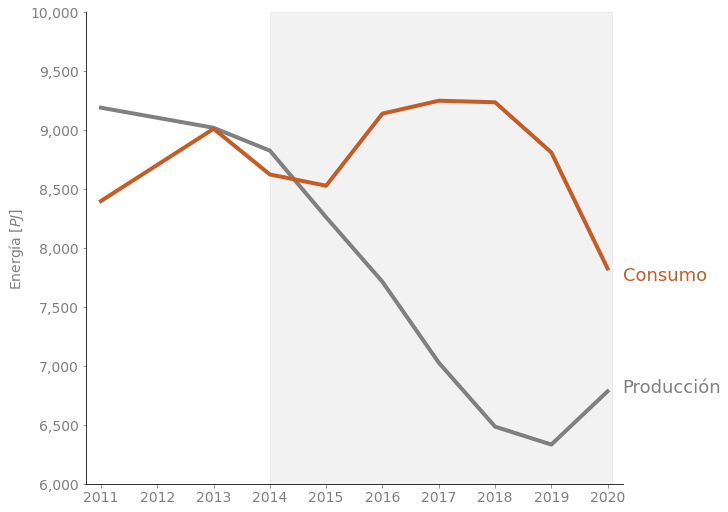

In [5]:
plt.style.use('../enerdata.mplstyle')

fig, ax = plt.subplots(constrained_layout=True)

#Grafica datos
ax.plot(ind["Producción"])
ax.plot(ind["Oferta Interna Bruta"], '-',color=doradoier)

#Fondo verde y rojo para separar a~nos
ax.axvspan(parse("2014-01-01"),parse("2020-01-31"),alpha=0.1,color="grey")

#L'imites en X y Y
ax.set_xlim(ind.index[0]-pd.Timedelta(100,"d"),ind.index[-1]+pd.Timedelta(100,"d"))
ax.set_ylim(6000,10000)

#Etiquetas y texto
ax.set_ylabel("Energía [$PJ$]")
# ax.set_xlabel("Año")


x = [dt.datetime(2020, 1, 1),dt.datetime(2020, 1, 1)]
y = [6650,7600]
ax.annotate('Producción', (mdates.date2num(x[0]), y[0]), xytext=(15, 15), 
            textcoords='offset points',size=18)
ax.annotate('Consumo', (mdates.date2num(x[1]), y[1]), xytext=(15, 15), 
            textcoords='offset points',size=18,c=doradoier)

# Formato de gr'afica
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.spines[['top','right']].set_visible(False)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

fig.savefig('Fig1.png',transparent=True)
